# Esercizio 08.1
L'esercizio richiede di implementare un algoritmo di Metropolis per il calcolo del valore di aspettazione dell'hamiltoniana di una particella quantistica in 1D:
$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$
con $\hbar = 1$ $m=1$ e 
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

L'espressione sopra si può riscrivere come:
$$
\langle \hat{H} \rangle_T = \int dx\, P_T(x) \cdot E_L(x)
$$

dove:

$$ P_T(x) = \frac{|\Psi_T(x)|^2}{\int dx\, |\Psi_T(x)|^2} $$ è la distribuzione di probabilità associata alla funzione d'onda di prova.
$$ E_L(x) = \frac{\hat{H} \Psi_T(x)}{\Psi_T(x)} $$ è l'energia locale , ovvero il risultato dell'operatore Hamiltoniano applicato alla funzione d'onda, diviso per la funzione stessa.

$E_L(x)$ è pari a:
$$
E_L(x) = \frac{-\frac{1}{2} \frac{d^2}{dx^2} \Psi_T(x)}{\Psi_T(x)} + V(x)
$$
con $V(x) = x^4 - \frac{5}{2}x^2$.

In pratica per stimare l'integrale si usa l'importance sampling (*vedi lezione 2*) campionando i valori della $x$ da $P_T(x)$. Per far ciò, non conoscendo la normalizzazione di $|\Psi_T(x)|^2$, si utilizza l'algoritmo di Metropolis.

Con l'algoritmo di Metropolis, ad ogni passo della simulazione:

1. Si propone una nuova posizione $ x' $ a partire dalla posizione attuale $ x $, utilizzando una distribuzione di transizione simmetrica $ T(x'|x) $, ad esempio uniforme in un intervallo centrato in $ x $.
2. Si calcola il rapporto tra le probabilità:

$$
A = \min\left(1, \frac{|\Psi_T(x')|^2}{|\Psi_T(x)|^2}\right)
$$

3. Si accetta $ x' $ con probabilità $ A $, altrimenti si mantiene $ x $ come nuova posizione.
4. Una volta generati abbastanza campioni (dopo un tempo di equilibrazione), si calcola la media dell’energia locale $ E_L(x) $ sui campioni estratti e l'incertezza col data blocking.

# Esercizio 08.2
L'esercizio richiede di trovare i parametri $\mu$ e $\sigma$ che minimizzano il valore di $\langle {\hat H} \rangle_T$. A tal fine si utilizza il simulated annealing. Si calcola $<H>$ con $\mu$ e $\sigma$, poi calcola $<H>'$ con valori $\mu'$ e $\sigma'$ estratti casualmente e si calcola la probabilità di accettazione:
$$
P = \exp\big(-\beta(\langle H' \rangle - \langle H \rangle)\big)
$$

Se la mossa viene accettata, calcolo un nuovo $<H>''$ con $\mu''$ e $\sigma''$ e rivaluto $P$ con $<H>'$ e $<H>''$, se la mossa viene rifiutata  rivaluto $P$ con $<H>$ e $<H>''$. Tutto ciò per un numero di blocchi **SA**. 
Questo è un ciclo di **SA**. Si ripete ogni ciclo partendo da una temperatura alta e raffreddando il sistema gradualmente, imitando il processo termodinamico per cui un liquido si ghiaccia e si cristallizza. Alla fine si trovano i parametri che minimizzano il valore di $<H>$.

Il sistema è stato simulato con:
- $20$ blocchi MC da $2000$ steps ciascuno;
- $100$ blocchi $SA$;
- $T_i$ pari a $1$ raffreddata moltiplicandola per $0.9$ per un totale di $100$ cicli;

**Energia con parametri ottimale**

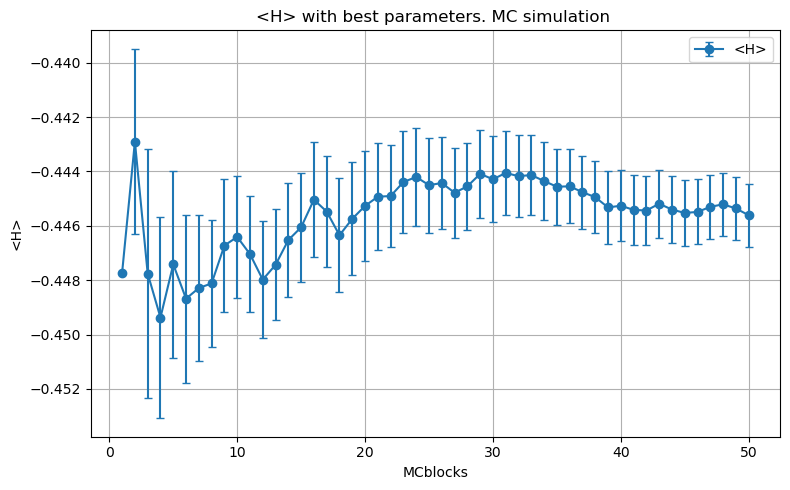

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#carico i dati
data = np.loadtxt("H.dat", comments="#")
Nblocks = data[:,0]
H_medio = data[:,2]
H_error = data[:,3]

#creo il grafico
plt.figure(figsize=(8, 5))
plt.errorbar(Nblocks, H_medio, yerr=H_error, label="<H>", fmt='-o', capsize=3)
plt.xlabel("MCblocks")
plt.ylabel("<H>")
plt.title("<H> with best parameters. MC simulation ")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

**Energia durante la simulazione SA**

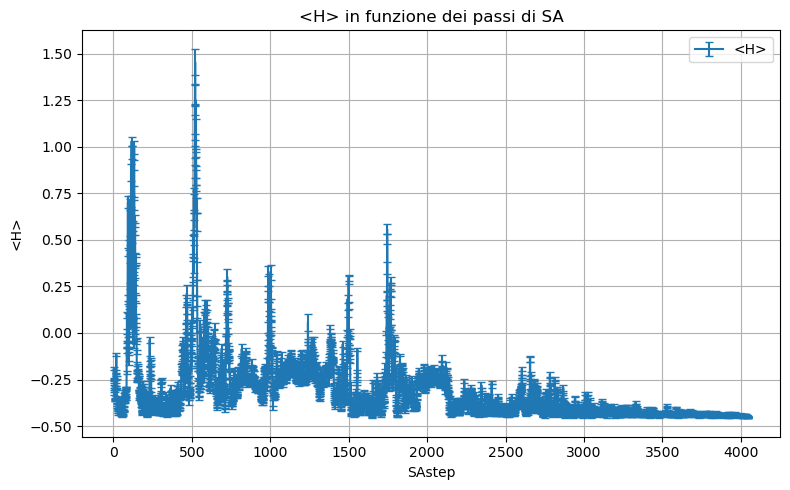

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#carico i dati
data =np.loadtxt("SAevolution.dat", comments="#")
SAstep = data[:,0].astype(int)
H_medio = data[:,1]
H_error = data[:,2]

#creo il grafico con i valori di <H> durante la simulazione SA
plt.figure(figsize=(8, 5))
plt.errorbar(SAstep, H_medio, yerr=H_error, label="<H>", fmt='-', capsize=3)
plt.xlabel("SAstep")
plt.ylabel("<H>")
plt.title("<H> in funzione dei passi di SA")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

**Traiettoria nello spazio dei parametri**

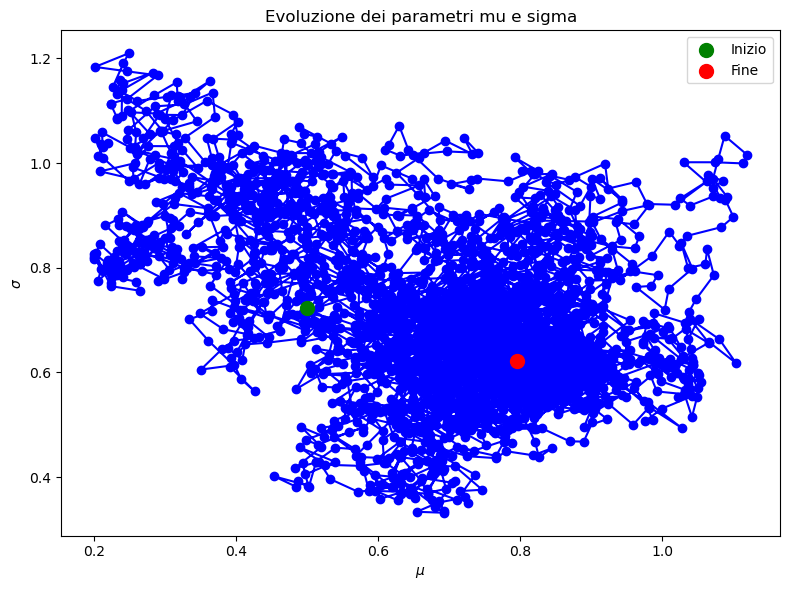

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#carico i dati
data1 =np.loadtxt("SAparameters.dat", comments="#")
mu = data1[:,0]
sigma = data1[:,1]
#creo il grafico con l'evoluzione dei parametri mu e sigma
plt.figure(figsize=(8, 6))
plt.plot(mu, sigma, linestyle='-', marker = 'o', color='blue' )
# Evidenzio il punto iniziale (primo)
plt.scatter(mu[0], sigma[0], color='green', s=100, label='Inizio', zorder=5)
# Evidenzio il punto finale (ultimo)
plt.scatter(mu[-1], sigma[-1], color='red', s=100, label='Fine', zorder=5)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')
plt.title('Evoluzione dei parametri mu e sigma')
plt.legend()
plt.tight_layout()
plt.show()

**Confronto di $\psi(x)$**

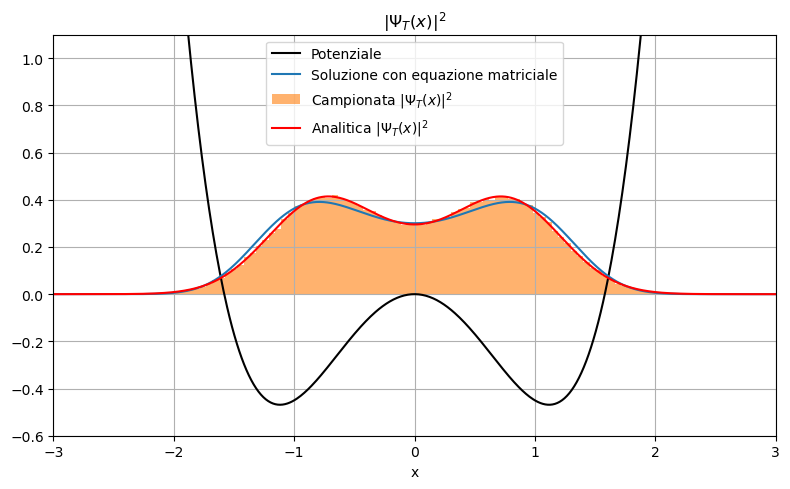

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#calcolo della soluzione matriciale di psi(x)
# Funzione potenziale V(x)
def Vpot(x):
    return (x**2 - 2.5)*x**2  

# Costanti fisiche (unità naturali: ħ = 1, m = 1)
hbar = 1
m = 1
a = 10          # Intervallo totale in cui risolviamo il problema ([-a/2, a/2])
N = 1000        # Numero di punti nella discretizzazione

# Creazione del dominio spaziale x e del passo dx
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0]            # Passo spaziale
V = Vpot(x)                 # Valori del potenziale sul dominio x

# Costruzione della matrice delle differenze finite centrali per la derivata seconda:
# f'' ≈ (f_{i+1} - 2*f_i + f_{i-1}) / dx^2
CDiff = (
    np.diag(np.ones(N-1), -1)  # diagonale sotto la principale
    - 2 * np.diag(np.ones(N), 0)  # diagonale principale
    + np.diag(np.ones(N-1), 1)  # diagonale sopra la principale
)

# Costruzione della matrice hamiltoniana:
# H = -ħ²/(2m) * d²/dx² + V(x)
H = (-(hbar**2) * CDiff) / (2 * m * dx**2) + np.diag(V)

# Calcolo degli autovalori (energie) e autovettori (funzioni d'onda) dell'Hamiltoniano
E, psi = np.linalg.eigh(H)

# Trasposizione della matrice psi: ogni riga sarà una funzione d'onda 
# Normalizzazione delle funzioni d'onda (integrale numerico ≈ somma dei quadrati * dx = 1)
psi = np.transpose(psi)
psi = psi / np.sqrt(dx)

# x_samples: array di configurazioni campionate
x_samples = np.loadtxt("x_sampled.dat")  

#migliori parametri di mu e sigma
data = np.loadtxt("best_parameters.dat", comments="#")
mu = data[0]
sigma = data[1]
#calcolo di psi normalizzata con tali parametri
x1 = np.linspace(-3, 3, 1000)
psi_T = np.exp(-(x1 - mu)**2 / (2 * sigma**2)) + np.exp(-(x1 + mu)**2 / (2 * sigma**2))
prob_density = psi_T**2
prob_density /= np.trapz(prob_density, x1)  # normalizza l'area sotto la curva


# Plotto i dati
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potenziale") # potenziale
plt.plot(x,(psi[0])**2, label= "Soluzione con equazione matriciale")#soluazione equazione matriciale
plt.hist(x_samples, bins=100, density=True, alpha=0.6, label=r'Campionata $|\Psi_T(x)|^2$')# Istogramma normalizzato della distribuzione campionata
plt.plot(x1, prob_density, label=r'Analitica $|\Psi_T(x)|^2$', color='red')#soluzione analitica con mu e sigma best
plt.title(r"$|\Psi_T(x)|^2$")
plt.xlabel("x")
plt.grid(True)
#imposto i limiti del grafico
plt.xlim((-3,3))
plt.ylim((-0.6,1.1))
plt.tight_layout()
plt.legend()
plt.show()

## Analisi e commenti
**1. Energia con parametri ottimali**

Il valore di $<H>$ ottenuto con metodo Monte-Carlo e algoritmo di Metropolis con i parametri migliori trovati con metodo $SA$ ($\mu \approx 0.795$ e $\sigma \approx 0.621$) è pari a:
$$
\langle H \rangle = -0.445609 \pm 0.00115244
$$
Consistente con la soluzione matriciale (vedi grafico $|\Psi_T(x)|^2$).


**2. Energia in funzione dei passi SA**

Inizialmente si osservano forti oscillazioni che vanno poi a ridursi e stabilizzarsi intorno al valore ottimale trovato precedentemente. Ciò è coerente con il processo di "raffreddamento": inizialmente la probabilità di accettazione è alta perchè è alta la temperatura e dunque sono possibili anche grandi salti di parametri e quindi di energia. Col diminuire della temperatura la probabilità diminuisce e i salti bruschi diventano sempre più improbabili; l'energia si stabilizza intorno a un minimo.


**3. Traiettoria nello spazio dei parametri**

Dato l'alto numero di cicli $SA$ effettuati, il grafico non risulta qualitativamente interessante. Tuttavia si può notare una buona esplorazione dello spazio delle fasi $\mu$ e $\sigma$ che si addensa intorno ai valori che minimizzano l'energia, in accordo con il processo di simulated annealing.


**4. Confronto delle varie soluzioni**

C'è essenzialmente un perfetto accordo tra la soluzione analitica con parametri ottenuti da $SA$, la soluzione campionata dalle $x$ con l'algoritmo di Metropolis e la soluzione matriciale dell'equazione di Schrodinger. Ciò conferma la potenza dei metodi $MC$ e del simulated annealing nel calcolo di problemi fisici-matematici dalla difficile se non impossibile soluzione analitica.

### Accorgimenti e punti critici di SA
Nel processo di ottimizzazione tramite simulated annealing, è fondamentale mantenere una percentuale di accettazione intorno al 50% nel criterio di Metropolis per esplorare al meglio lo spazio delle fasi. Con un'accettazione troppo bassa infatti il sistema accetta raramente nuove configurazioni. Rischia di rimanere intrappolato in minimi locali, rendendo l’ottimizzazione inefficace.

E' importante anche bilanciare i parametri del $SA$ per trovare una soluzione ottimale. Salti troppo piccoli nei nuovi valori di $\mu$ e $\sigma$ rischiano di intrappolare il processo in minimi locali e non arrivare mai a convergenza, mentre salti troppo grandi rischiano di evitare buoni parametri. Un numero troppo basso di blocchi $SA$ compromette un'efficiente esplorazione dello spazio delle fasi e dunque il campionamento energetico, trascurando possibili parametri ottimali. Infine, anche un raffreddamento troppo brusco compromette la convergenza verso soluzioni ottimali. Un decremento troppo rapido della temperatura non lascia al sistema il tempo sufficiente per esplorare efficacemente lo spazio delle fasi, causando il rischio di rimanere intrappolati in minimi locali.  
È quindi fondamentale adottare un raffreddamento graduale, che consenta al sistema di adattarsi lentamente e di migliorare progressivamente la soluzione.
